# Import

In [51]:
import os

import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Experiment

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/opt/anaconda/envs/global/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/anaconda/envs/global/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/nguyenlc/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [4]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [3]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2023-07-31 09:11:55--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.241.68, 16.182.42.33, 3.5.25.203, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.241.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39,88K  86,0KB/s    in 0,5s    

2023-07-31 09:11:56 (86,0 KB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [5]:
ig = Image.open("000000037777.jpg")

In [6]:
transform = T.ToTensor()
img = transform(ig)

In [7]:
with torch.no_grad():
    pred = model([img])

In [8]:
pred

[{'boxes': tensor([[291.1583,  75.6388, 351.1081, 230.0000],
          [137.2317, 126.4134, 196.8072, 192.6794],
          [234.0298, 187.5376, 257.2588, 206.0069],
          [ 69.8429, 180.6238, 294.8978, 227.8893],
          [215.5545, 186.7090, 232.4908, 201.2714],
          [229.2052, 178.4287, 242.4043, 189.1334],
          [102.2816, 119.1606, 109.7579, 136.2550],
          [204.3586, 187.4953, 220.2825, 207.8441],
          [217.1612, 200.5048, 231.4939, 214.6144],
          [231.3621, 200.6433, 247.9374, 217.5594],
          [202.8858, 180.7723, 259.0847, 215.1571],
          [265.9250, 134.4927, 293.7535, 137.7777],
          [ 98.9475, 120.0403, 110.6324, 175.7941],
          [232.8049, 188.9269, 247.0089, 201.1433],
          [256.9217, 132.6738, 295.4498, 138.2876],
          [175.0697, 111.2454, 185.6406, 137.4315],
          [195.5084, 120.2847, 202.1774, 134.7075],
          [263.7628, 129.0698, 299.0514, 137.4496],
          [196.6427, 181.2184, 263.6159, 219.1484],
   

In [10]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [11]:
bboxes, labels, scores = pred[0]['boxes'], pred[0]['labels'], pred[0]['scores']

In [12]:
num = torch.argwhere(scores > 0.9).shape[0]
num

5

In [13]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , "frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , "baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , "plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , "banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" , "pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" , "mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" , "laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" , "oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" , "clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [23]:
igg = cv2.imread('000000037777.jpg')
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype('int')
    class_name = coco_names[labels.numpy()[i]-1]
    igg = cv2.rectangle(igg, (x1,y1), (x2,y2), (0,255,0), 1)
    igg = cv2.putText(igg, class_name, (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv2.LINE_AA)
   

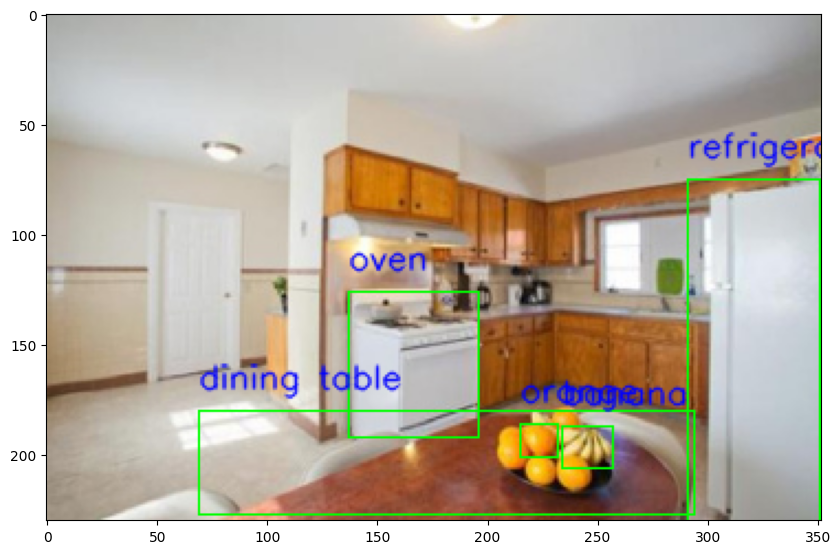

In [30]:
plt.figure(figsize=(10,10))
plt.imshow(igg[:,:,::-1])

# Fine-tuning

## Modifying the model to add a different backbone

In [40]:
backbone = torchvision.models.vgg16(weights="VGG16_Weights.IMAGENET1K_V1").features
backbone.out_channels = 512

In [35]:
anchor_generator = AnchorGenerator(sizes=((64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

# if rpn_anchor_generator is None:
#     rpn_anchor_generator = _default_anchorgen()

# def _default_anchorgen():
#     anchor_sizes = ((32,), (64,), (128,), (256,), (512,))
#     aspect_ratios = ((0.5, 1.0, 2.0),) * len(anchor_sizes)
#     return AnchorGenerator(anchor_sizes, aspect_ratios)            

In [43]:
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
                                                output_size=7,
                                                sampling_ratio=2)

# if box_roi_pool is None:
#     box_roi_pool = MultiScaleRoIAlign(featmap_names=["0", "1", "2", "3"], output_size=7, sampling_ratio=2)

In [45]:
model = FasterRCNN(backbone,
                   num_classes=8,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)

In [46]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(in

In [47]:
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]

In [48]:
predictions = model(x)

In [ ]:
predictions

In [50]:
def get_transform(train):
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ConvertImageDtype(torch.float))
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [ ]:
class AITODDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms):
        self.root = root
        self.transforms = transforms
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(mask_path)
        # convert the PIL Image into a numpy array
        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = mask == obj_ids[:, None, None]

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.nonzero(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        # convert everything into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)